In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/UniversalBank.csv") #load the dataset

In [ ]:
df.head(5) #show the first 5 rows from the dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIP Code           5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
#Checking for null values
df.isnull().sum()

ID                   0
Age                  0
Experience           0
Income               0
ZIP Code             0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [ ]:
df.shape

(5000, 14)

In [ ]:
#Checking for duplicated
df.duplicated().sum()

0

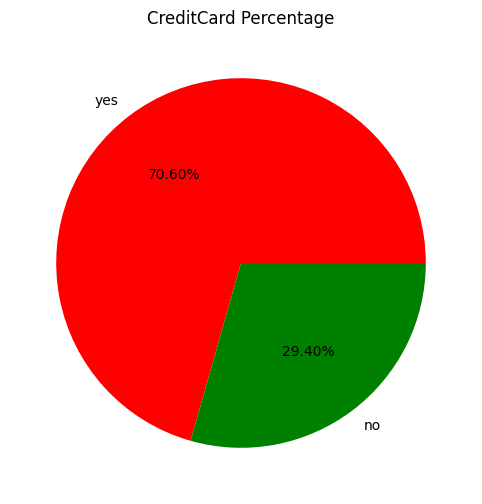

In [ ]:
#Plot pie chart to show Lung Cancer Percentage
plt.figure(figsize=(10,6))
plt.pie(df['CreditCard']. value_counts(),labels=['yes','no'],autopct='%1.2f%%', colors=['red','green'])
plt.title('CreditCard Percentage')
plt.show()

In [ ]:
Y1 = df.CreditCard
X1 = df.drop('CreditCard', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1,Y1, test_size=0.2, random_state=42)

In [ ]:
#simple svc
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#score for train set
svm_train_pred = clf.predict(X_train)
svm_a_train = metrics.accuracy_score(y_train, svm_train_pred)

#score for test set
svm_test_pred = clf.predict(X_test)
svm_a_test = metrics.accuracy_score(y_test, svm_test_pred)

print('svm = train accuracy = %.4f'% svm_a_train)
print('svm = test accuracy = %.4f'% svm_a_test)

svm = train accuracy = 0.7055
svm = test accuracy = 0.7080


In [ ]:
# confusion matrix for train set
svm_c_train = confusion_matrix(y_train, svm_train_pred)

#confusion matrix for tests et
svm_c_test = confusion_matrix(y_test, svm_test_pred)

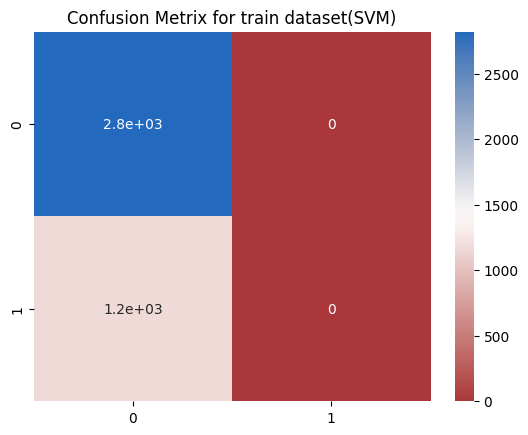

In [ ]:
sns.heatmap(svm_c_train, annot=True, cmap="vlag_r")
plt.title("Confusion Metrix for train dataset(SVM)");

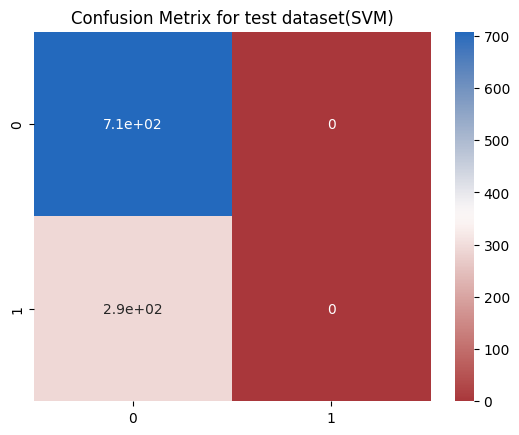

In [ ]:
sns.heatmap(svm_c_test, annot=True, cmap="vlag_r")
plt.title("Confusion Metrix for test dataset(SVM)");

In [ ]:
svm_report = classification_report(y_test,svm_test_pred)
print(svm_report)

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       708
           1       0.00      0.00      0.00       292

    accuracy                           0.71      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.50      0.71      0.59      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MODEL 2

In [ ]:
#tuned model
from sklearn.model_selection import GridSearchCV
from sklearn import svm

clf = svm.SVC()

grid = [
        {'C' : np.logspace(-4, 2, 20),
         'kernel' : ['sigmoid','linear', 'rbf']
         }
        ]

clf = GridSearchCV(clf, param_grid = grid,cv = 3)
best_clf = clf.fit(X_train, y_train)

print(best_clf.best_estimator_)
print('train score: ',best_clf.score(X_train,y_train))
print('test score: ',best_clf.score(X_test,y_test))

SVC(C=0.0001, kernel='linear')
train score:  0.70575
test score:  0.708


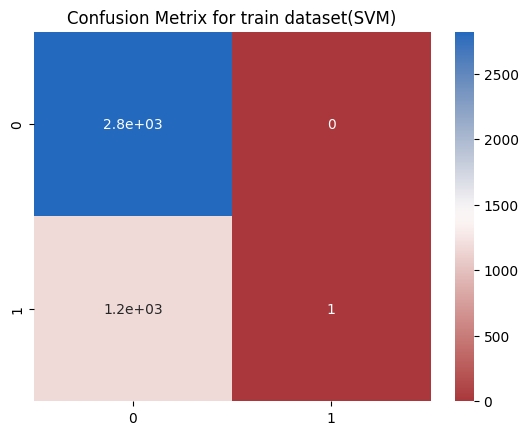

In [ ]:
#confusion matrix for train set

svm_train_pred = best_clf.predict(X_train)
svm_a_train = metrics.accuracy_score(y_train, svm_train_pred)
svm_c_train = confusion_matrix(y_train, svm_train_pred)

sns.heatmap(svm_c_train, annot=True, cmap="vlag_r")
plt.title("Confusion Metrix for train dataset(SVM)");

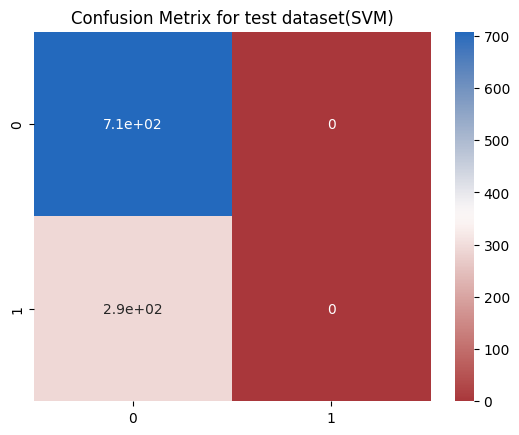

In [ ]:
#confusion  matrix for test set

svm_test_pred = best_clf.predict(X_test)
svm_a_test = metrics.accuracy_score(y_test, svm_test_pred)
svm_c_test = confusion_matrix(y_test, svm_test_pred)

sns.heatmap(svm_c_test, annot=True, cmap="vlag_r")
plt.title("Confusion Metrix for test dataset(SVM)");

In [ ]:
svm_report = classification_report(y_test,svm_test_pred)
print(svm_report)

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       708
           1       0.00      0.00      0.00       292

    accuracy                           0.71      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.50      0.71      0.59      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import metrics
from sklearn.svm import SVC
from scipy import stats
import numpy as np

In [ ]:
# Identify outliers using the Z-score method
z_scores = stats.zscore(X_train)

# Define a threshold for considering data points as outliers (e.g., z-score > 3 or < -3)
threshold = 3

# Find the indices of outliers
outlier_indices = (np.abs(z_scores) > threshold).any(axis=1)

In [ ]:
# Remove outliers from both the training set and labels
X_train_no_outliers = X_train[~outlier_indices]
y_train_no_outliers = y_train[~outlier_indices]

In [ ]:
# Create and train the SVM model with outlier-filtered data
clf = SVC(C=4.0, kernel='rbf')
clf.fit(X_train_no_outliers, y_train_no_outliers)

SVC(C=4.0)

In [ ]:
# Score the model on the filtered training set
svm_train_pred = clf.predict(X_train_no_outliers)
svm_a_train = metrics.accuracy_score(y_train_no_outliers, svm_train_pred)

# Score the model on the original test set
svm_test_pred = clf.predict(X_test)
svm_a_test = metrics.accuracy_score(y_test, svm_test_pred)

print('svm = train accuracy = %.4f'% svm_a_train)
print('svm = test accuracy = %.4f'% svm_a_test)

svm = train accuracy = 0.7254
svm = test accuracy = 0.7080


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix and classification report for training data
train_confusion_matrix = confusion_matrix(y_train_no_outliers, svm_train_pred)
train_classification_report = classification_report(y_train_no_outliers, svm_train_pred)

# Calculate confusion matrix and classification report for test data
test_confusion_matrix = confusion_matrix(y_test, svm_test_pred)
test_classification_report = classification_report(y_test, svm_test_pred)

# Print confusion matrices and classification reports
print("Confusion Matrix (Train):\n", train_confusion_matrix)

Confusion Matrix (Train):
 [[2451    0]
 [ 928    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
print("Classification Report (Train):\n", train_classification_report)

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.73      1.00      0.84      2451
           1       0.00      0.00      0.00       928

    accuracy                           0.73      3379
   macro avg       0.36      0.50      0.42      3379
weighted avg       0.53      0.73      0.61      3379



In [ ]:
print("Confusion Matrix (Test):\n", test_confusion_matrix)

Confusion Matrix (Test):
 [[708   0]
 [292   0]]


In [ ]:
print("Classification Report (Test):\n", test_classification_report)

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.71      1.00      0.83       708
           1       0.00      0.00      0.00       292

    accuracy                           0.71      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.50      0.71      0.59      1000

